# 601 Project 2
## This Analysis is about Town Cary Crashes from the Year 2012 to 2017
### DataSet Source: https://data.world/townofcary/cpd-crash-incidents/workspace/file?filename=crash-data_4.csv

### The Analysis Include following Hypothesis:
#####    1. Most Crashes happen in which Weather. 
#####    2. Crashes happen in which light conditions.
#####    3. Percentage of injuries during Crash.
#####    4.Crashes happen in which part of the day.
#####    5. Which part of the week more crashes occur.
#####    6. Which type of roads has less crashes reported.
#####    7. Which month recorded less crashes.

In [1]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import re
import datetime
import plotly.graph_objects as go
from IPython.core.display import HTML
import requests
from io import StringIO


orig_url = "https://drive.google.com/file/d/1dfyITbvAvzpoOHxWg2_AwEAVIYDkPirA/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

In [2]:
Nullcheck = df.isnull().sum()    #checking how many null values are present in dataset by column
Nullcheck

tamainid                    0
location_description        2
rdfeature                 735
rdcharacter              3737
rdclass                  3851
rdconfigur               3857
rdsurface                3730
rdcondition              3725
lightcond                3816
weather                  3831
trafcontrl               3991
lat                     12567
lon                     12567
lon2                    10053
lat2                    10050
tract                   13105
zone                    11639
fatality                 3292
possblinj                3292
numpassengers           17690
numpedestrians          25380
contrcir1_desc           9170
contrcir2_desc          25432
contrcir3_desc           4160
contrcir4_desc          25403
vehicle1                 4295
vehicle2                 7275
vehicle3                24194
vehicle4                25332
vehicle5                25457
workarea                 4058
records                  3362
ta_date                  3362
ta_time   

In [3]:
print(df.shape)   #Prints number of columns and rows

(25489, 47)


In [4]:
drop_cols=['lon2','lat2','tract','zone','fatality','possblinj','numpedestrians','contrcir1_desc','contrcir2_desc','contrcir3_desc',
          'contrcir4_desc','records','rdclass','rdcharacter','geo_location','contrfact2','contrfact1','vehicle3','tract','vehicle4','vehicle5','contributing_factor','vehicleconcat1','vehicleconcat2','vehicleconcat3','vehicle_type']

df=df.drop(drop_cols,axis=1)          #Dropping the unwanted columns

In [5]:
print(df.isnull().sum())          #prints number of null values

tamainid                    0
location_description        2
rdfeature                 735
rdconfigur               3857
rdsurface                3730
rdcondition              3725
lightcond                3816
weather                  3831
trafcontrl               3991
lat                     12567
lon                     12567
numpassengers           17690
vehicle1                 4295
vehicle2                 7275
workarea                 4058
ta_date                  3362
ta_time                  3362
crash_date               3362
year                     3362
fatalities               3362
injuries                 3362
month                    3362
dtype: int64


In [6]:
print(df.shape)             #Prints number of columns and rows

(25489, 22)


In [7]:
df["numpassengers"].fillna( method ='ffill', inplace = True)
df["rdconfigur"].fillna( method ='bfill', inplace = True)
df["vehicle2"].fillna( method ='ffill', inplace = True)
df["lat"].fillna( method ='bfill', inplace = True)
df["lon"].fillna( method ='bfill', inplace = True)

#Filling up the null values using back fill and forward fill

In [8]:
print(df.isnull().sum())       #prints number of null values

tamainid                   0
location_description       2
rdfeature                735
rdconfigur                 0
rdsurface               3730
rdcondition             3725
lightcond               3816
weather                 3831
trafcontrl              3991
lat                        0
lon                        0
numpassengers              3
vehicle1                4295
vehicle2                   1
workarea                4058
ta_date                 3362
ta_time                 3362
crash_date              3362
year                    3362
fatalities              3362
injuries                3362
month                   3362
dtype: int64


In [9]:
df1=df.drop_duplicates(keep='first')            #Dropping the duplicate values

In [10]:
print(df.shape) #After checking for duplicates           #printing the shape of datasets which gives number of columns and rows
print(df1.shape) #Before checking for duplicates     
#so here columns and rows were same before and after. So there are no duplicate values

(25489, 22)
(25489, 22)


In [11]:
df.dropna(axis=0,inplace=True)            #dropping null values

In [12]:
print(df.shape)                 ##printing the shape of datasets which gives number of columns and rows

(20814, 22)


In [13]:
print(df.isnull().sum())            #prints number of null values

tamainid                0
location_description    0
rdfeature               0
rdconfigur              0
rdsurface               0
rdcondition             0
lightcond               0
weather                 0
trafcontrl              0
lat                     0
lon                     0
numpassengers           0
vehicle1                0
vehicle2                0
workarea                0
ta_date                 0
ta_time                 0
crash_date              0
year                    0
fatalities              0
injuries                0
month                   0
dtype: int64


# EXPLORATORY DATA ANALYSIS

## Hypothesis 1 :  Most Crashes happen in rainy days


<AxesSubplot:title={'center':'Accidents by Weather'}, xlabel='weather', ylabel='count'>

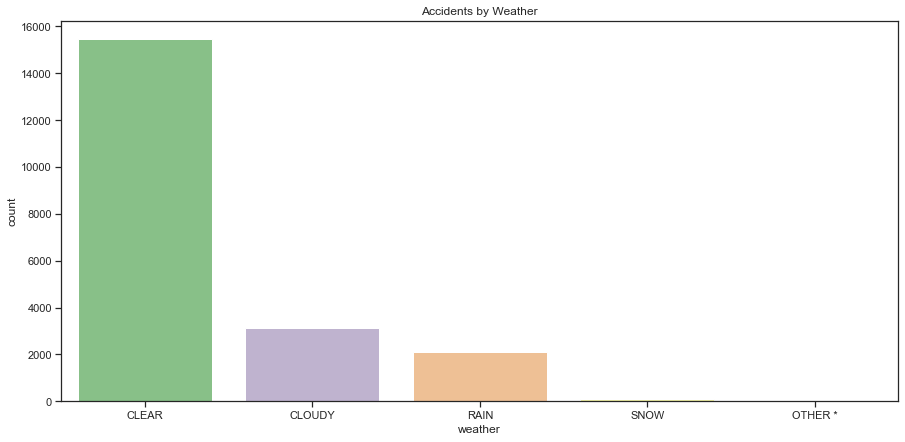

In [14]:
#countplot is used to create the hist or bar graphs
#plotting Crashes by Weather
plt.figure(1, figsize=(15, 7))
plt.title("Accidents by Weather")
sns.countplot(x = "weather", order=df['weather'].value_counts().index[0:10],data=df,palette='Accent')

#### From the above graph we can see that accidents happen more when weather is clear. So, our hypothesis is False.

## Hypothesis 2 : Percentage of Injuries during crash will be less.

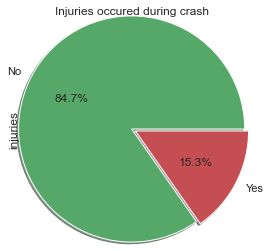

In [15]:
d=df['injuries'].value_counts()
d.plot.pie(radius=1.3,explode=[0,0.05],autopct='%1.1f%%',shadow=True, colors='gr')
plt.title('Injuries occured during crash')
plt.show()

#plotting pie chart to display percentage of injuries.

#### From the graph we can see there were only 15% injuries during crashes. So, our hypothesis is True.

In [16]:
df.crash_date = pd.to_datetime(df.crash_date)  #getting crash dates
df.crash_date

3       2012-02-22 20:09:05+00:00
4       2012-02-27 18:02:25+00:00
5       2012-02-28 21:15:17+00:00
6       2012-02-28 23:00:09+00:00
8       2012-03-01 22:39:16+00:00
                   ...           
25484   2015-03-22 18:43:25+00:00
25485   2015-03-24 16:33:00+00:00
25486   2015-03-25 15:09:00+00:00
25487   2015-03-24 20:52:30+00:00
25488   2015-03-27 15:16:00+00:00
Name: crash_date, Length: 20814, dtype: datetime64[ns, UTC]

## Hypothesis 3: Mornings Tends to have more crashes.


Text(0.5, 0, 'Hours')

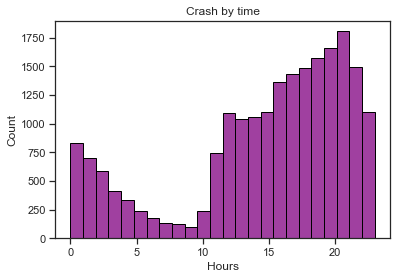

In [17]:
sns.histplot(df.crash_date.dt.hour, bins=24,color='purple',edgecolor='black')
plt.title('Crash by time')             #assigning the title
plt.xlabel('Hours')

#plotting using hist to show which time has more crashes reported.

#### From the graph above we can see crashes happen around 7-10PM. So, our hypothesis is false. 

## Hypothesis 4:  less crashes happens on Weekends.

<AxesSubplot:xlabel='crash_date', ylabel='Count'>

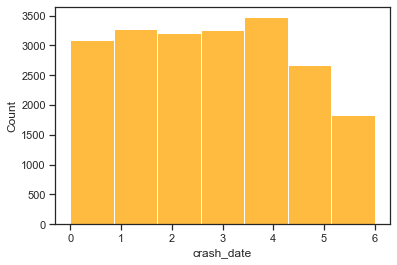

In [18]:
sns.histplot(df.crash_date.dt.dayofweek, bins=7,color='orange')   # Here 0-monday, 1-Tuesday....,6-Sunday

#Reference: https://www.geeksforgeeks.org/python-pandas-series-dt-dayofweek/

#### From the graph Fridays tends to have more crashes and sunday has less crashes. So, hypothesis is True.

#### Also, According to the data given by OHSO report.
#### FRIDAY reported more number of accidents and SUNDAY reported less number of accidents.


# Year VS month
### Here, only December 2017 didn't report any crash.
#### This is because december 2017 data is not given in our dataset.

### We can conclude that every month of the year from 2012-2017 Crashes had happened.

<AxesSubplot:xlabel='year', ylabel='month'>

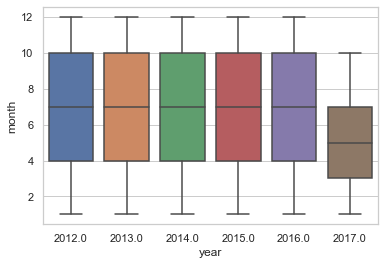

In [19]:
import seaborn                #importing seaborn
seaborn.set(style='whitegrid')
seaborn.boxplot(x="year",
                y="month",            #assigning X,Y axis with year and month
                data=df)


#plotting boxplot for Year and month

## Hypothesis 5: Wet roads tends to have more crashes.

<AxesSubplot:xlabel='rdcondition', ylabel='Count'>

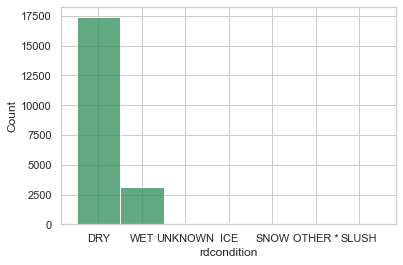

In [20]:
import seaborn as sns                  #importing seaborn
import matplotlib.pyplot as plt
sns.histplot(df.rdcondition,bins=10,color = "seagreen")         #plotting using hist and giving the appropriate color

#### Than wet roads, dry roads had more crashes. So, our hypothesis is False.

## Hypothesis 6: Winter months tend to have more crashes.

<AxesSubplot:xlabel='month', ylabel='Count'>

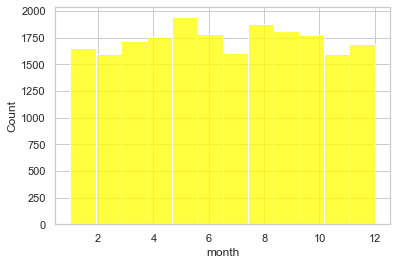

In [21]:
sns.histplot(df.month,bins=12,color = "yellow")            #plotting no. of accidents by month


#### Here MAY had many crashes reported. So, our hypothesis is False.

### According to many other analysis, I found that more accidents tend to happen in Summer. 

### https://www.petruzelo.com/tips-are-car-accidents-more-likely-to-occur-during-winter.php#:~:text=Many%20people%20assume%20that%20accidents%20are%20more%20likely,weather%2C%20which%20makes%20accidents%20more%20likely%20to%20occur.

# Location of Crashes

In [22]:
!pip install folium
import folium
for x in df[['lat', 'lon']].sample(100).iteritems(): #iterating through all the longitude and latitude values to plot
    print(x[1])

24864    35.819084
16201    35.746398
23180    35.823551
7072     35.801296
5311     35.820401
           ...    
19871    35.842343
2518     35.791936
16564    35.742022
4786     35.820002
7851     35.829708
Name: lat, Length: 100, dtype: float64
24864   -78.743861
16201   -78.742307
23180   -78.886137
7072    -78.805195
5311    -78.873682
           ...    
19871   -78.903313
2518    -78.775625
16564   -78.798080
4786    -78.778494
7851    -78.768514
Name: lon, Length: 100, dtype: float64


In [23]:
zip(list(df.lat), list(df.lon))   #zipping creates pairs

In [24]:
from folium.plugins import HeatMap   #importing heat map from folium

In [25]:
sample_df = df.sample(int(0.001 * len(df)))          #taking one percent of data here from dataset
lat_lon_pairs = list(zip(list(sample_df.lat), list(sample_df.lon)))  
#creating pairs of longitude and longitude and adding them to map

In [26]:
!pip install folium
import folium
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)          #adding longitude and latitude values to map to create heat map.
map


# Here we can see town cary where most crashes occured.

# Road condition VS year

Text(0.5, 1.0, 'Road conditions VS Year')

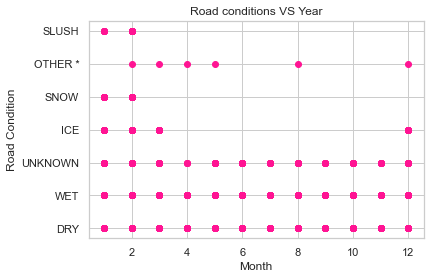

In [27]:
plt.scatter(df['month'], df['rdcondition'], c='deeppink')
plt.xlabel('Month')                              #plotting month and roadcondition using scatter plot
plt.ylabel('Road Condition')
plt.title('Road conditions VS Year')             #this gives the title for scatter plot

#### Here we can see in which month which roadcondition caused crash.

# Conclusion
# According to my analysis:
## To be safe on roads in the town of cary, travel on sunday evenings when weather is clear.